In [ ]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
from keras.callbacks import ModelCheckpoint
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [ ]:
print(train_dir)
print(validation_dir)
print(test_dir)

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255)
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

In [ ]:
validation_image_generator = ImageDataGenerator(rescale=1./255)
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=validation_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

In [ ]:
test_image_generator = ImageDataGenerator(rescale=1./255) 
test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,directory=test_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

In [ ]:
print(len(train_data_gen))
print(len(val_data_gen))
print(len(test_data_gen))

In [ ]:
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])

In [ ]:
train_image_generator = ImageDataGenerator(vertical_flip=True, horizontal_flip=True, rescale=1./255)


In [ ]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

#plotImages(augmented_images)

In [182]:
from keras.layers import BatchNormalization

model = Sequential()
# conv # 1
model.add(keras.layers.Conv2D(16,(3,3), activation="relu",input_shape = (150,150,3))) #148
model.add(keras.layers.MaxPooling2D(2,2)) #74

# conv # 2
model.add(keras.layers.Conv2D(32, (3,3),activation="relu")) #72
model.add(keras.layers.MaxPooling2D(2,2))#36
# conv # 3
model.add(keras.layers.Conv2D(64, (3,3),activation="relu")) #34
model.add(keras.layers.MaxPooling2D(2,2))#16

model.add(keras.layers.Conv2D(64, (3,3),activation="relu")) #14
model.add(keras.layers.MaxPooling2D(2,2))#7

model.add(keras.layers.Conv2D(64, (3,3),activation="relu")) #5
model.add(keras.layers.MaxPooling2D(2,2))#3

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dropout(0.3))
#model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_104 (Conv2D)         (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_82 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_105 (Conv2D)         (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_83 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_106 (Conv2D)         (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_84 (MaxPoolin  (None, 17, 17, 64)     

In [ ]:
from keras.utils.vis_utils import plot_model
from PIL import Image

plot_model(model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True, show_layer_activations=True)
display(Image.open('cnn_model.png'))

In [183]:
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=["accuracy"])
#model.compile(loss=keras.losses.BinaryCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [184]:
epochs_steps = train_data_gen.n // train_data_gen.batch_size # 2000 images  = batchsize * steps
val_steps = val_data_gen.n//val_data_gen.batch_size  # 1000 images  = batchsize * steps
history=model.fit(train_data_gen, epochs=15, validation_data=val_data_gen, steps_per_epoch=epochs_steps, validation_steps=val_steps )

Epoch 1/15
15/15 [==============================] - 72s 4s/step - loss: 0.7007 - accuracy: 0.5027 - val_loss: 0.6915 - val_accuracy: 0.5067
Epoch 2/15
15/15 [==============================] - 58s 4s/step - loss: 0.6932 - accuracy: 0.5037 - val_loss: 0.6906 - val_accuracy: 0.5737
Epoch 3/15
15/15 [==============================] - 59s 4s/step - loss: 0.6915 - accuracy: 0.5385 - val_loss: 0.6951 - val_accuracy: 0.5067
Epoch 4/15
15/15 [==============================] - 58s 4s/step - loss: 0.7849 - accuracy: 0.5668 - val_loss: 0.6674 - val_accuracy: 0.6004
Epoch 5/15
15/15 [==============================] - 58s 4s/step - loss: 0.6808 - accuracy: 0.5903 - val_loss: 0.6578 - val_accuracy: 0.6071
Epoch 6/15
15/15 [==============================] - 58s 4s/step - loss: 0.6745 - accuracy: 0.5828 - val_loss: 0.6551 - val_accuracy: 0.6261
Epoch 7/15
15/15 [==============================] - 57s 4s/step - loss: 0.6661 - accuracy: 0.6047 - val_loss: 0.6505 - val_accuracy: 0.6071
Epoch 8/15
15/15 [==

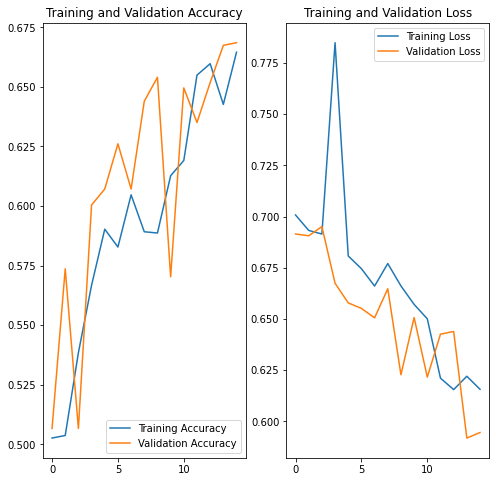

In [185]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [187]:
test_loss, test_accuracy = model.evaluate(test_data_gen, verbose=1)
print("Accuracy for test images are: ", test_accuracy)

1/1 [==============================] - 1s 696ms/step - loss: 1.0431 - accuracy: 0.6400
Accuracy for test images are:  0.6399999856948853


In [188]:
probabilities = model.predict(test_data_gen, verbose=2)


1/1 - 1s - 1s/epoch - 1s/step


In [ ]:
import numpy as np

In [189]:

answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if np.round(probability) == answer:
        correct +=1

print('Correct: ', correct)
percentage_identified = (correct / len(answers))

passed_challenge = percentage_identified > 0.63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Correct:  26
Your model correctly identified 0.52% of the images of cats and dogs.
You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!
